In [22]:
import pandas as pd
from pandas import DataFrame
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#For data preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder


import seaborn as sns
from sklearn.metrics import log_loss,roc_auc_score,precision_score,f1_score,recall_score,roc_curve,auc
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score,fbeta_score,matthews_corrcoef
from sklearn import metrics
from sklearn.metrics import log_loss
from imblearn.metrics import geometric_mean_score
import warnings
import re
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,VotingClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC 
import xgboost as xgb
from vecstack import stacking
from scipy import stats
import os


#For model building
import keras
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import regularizers

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import classification_report
import statsmodels.api as sm



In [2]:
df=pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
df_copy= df.copy()
df_copy.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df_copy['restecg'].replace(['normal', 'st-t abnormality', 'lv hypertrophy'],[0,1,2],inplace=True)
df_copy['exng'].replace([True,False],[1,0],inplace=True)
df_copy

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [5]:
df_copy['fbs'].replace([True,False],[1,0],inplace=True)
df_copy

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [6]:
## Checking missing entries in the dataset columnwise
df_copy.isna().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [7]:
df_copy.shape

(303, 14)

In [8]:
# summary statistics of numerical columns
df_copy.describe(include =[np.number])

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [9]:
cat_cols = df[['caa', 'cp', 'restecg', 'exng', 'sex', 'output']].copy()
cat_cols.head()

,caa,cp,restecg,exng,sex,output
0,0,3,0,0,1,1
1,0,2,1,0,1,1
2,0,1,0,0,0,1
3,0,1,1,0,1,1
4,0,0,1,1,0,1


In [10]:
num_cols = df[['age','trtbps','fbs','thalachh','oldpeak','slp','thall','chol']].copy()
num_cols.head()

,age,trtbps,fbs,thalachh,oldpeak,slp,thall,chol
0,63,145,1,150,2.3,0,1,233
1,37,130,0,187,3.5,0,2,250
2,41,130,0,172,1.4,2,2,204
3,56,120,0,178,0.8,2,2,236
4,57,120,0,163,0.6,2,2,354


In [11]:
sc = StandardScaler()
le = LabelEncoder()

In [12]:
for col in cat_cols.columns:
    cat_cols[col] = le.fit_transform(cat_cols[col])
        
sc_num_cols = sc.fit_transform(num_cols)
num_cols = pd.DataFrame(sc_num_cols,columns = num_cols.columns)

In [13]:
cat_cols.head()

,caa,cp,restecg,exng,sex,output
0,0,3,0,0,1,1
1,0,2,1,0,1,1
2,0,1,0,0,0,1
3,0,1,1,0,1,1
4,0,0,1,1,0,1


In [14]:
num_cols.head()

,age,trtbps,fbs,thalachh,oldpeak,slp,thall,chol
0,0.952197,0.763956,2.394438,0.015443,1.087338,-2.274579,-2.148873,-0.256334
1,-1.915313,-0.092738,-0.417635,1.633471,2.122573,-2.274579,-0.512922,0.072199
2,-1.474158,-0.092738,-0.417635,0.977514,0.310912,0.976352,-0.512922,-0.816773
3,0.180175,-0.663867,-0.417635,1.239897,-0.206705,0.976352,-0.512922,-0.198357
4,0.290464,-0.663867,-0.417635,0.583939,-0.379244,0.976352,-0.512922,2.082050


In [15]:
df_final = pd.concat([num_cols,cat_cols],axis = 1)
df_final.head()

,age,trtbps,fbs,thalachh,oldpeak,slp,thall,chol,caa,cp,restecg,exng,sex,output
0,0.952197,0.763956,2.394438,0.015443,1.087338,-2.274579,-2.148873,-0.256334,0,3,0,0,1,1
1,-1.915313,-0.092738,-0.417635,1.633471,2.122573,-2.274579,-0.512922,0.072199,0,2,1,0,1,1
2,-1.474158,-0.092738,-0.417635,0.977514,0.310912,0.976352,-0.512922,-0.816773,0,1,0,0,0,1
3,0.180175,-0.663867,-0.417635,1.239897,-0.206705,0.976352,-0.512922,-0.198357,0,1,1,0,1,1
4,0.290464,-0.663867,-0.417635,0.583939,-0.379244,0.976352,-0.512922,2.082050,0,0,1,1,0,1


In [16]:
X = df_final.drop("output",axis = 1)
y = df_final.output


In [17]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


Initial Test Accuracy: 0.8360655737704918
Test Accuracy after update 242: 0.8360655737704918
Test Accuracy after update 242: 0.8360655737704918
Test Accuracy after update 243: 0.8360655737704918
Test Accuracy after update 243: 0.8360655737704918
Test Accuracy after update 244: 0.8360655737704918
Test Accuracy after update 244: 0.8360655737704918
Test Accuracy after update 245: 0.8524590163934426
Test Accuracy after update 245: 0.8524590163934426
Test Accuracy after update 246: 0.819672131147541
Test Accuracy after update 246: 0.819672131147541
Test Accuracy after update 247: 0.8360655737704918
Test Accuracy after update 247: 0.8360655737704918
Test Accuracy after update 248: 0.8360655737704918
Test Accuracy after update 248: 0.8360655737704918
Test Accuracy after update 249: 0.8360655737704918
Test Accuracy after update 249: 0.8360655737704918
Test Accuracy after update 250: 0.8360655737704918
Test Accuracy after update 250: 0.8360655737704918
Test Accuracy after update 251: 0.85245901

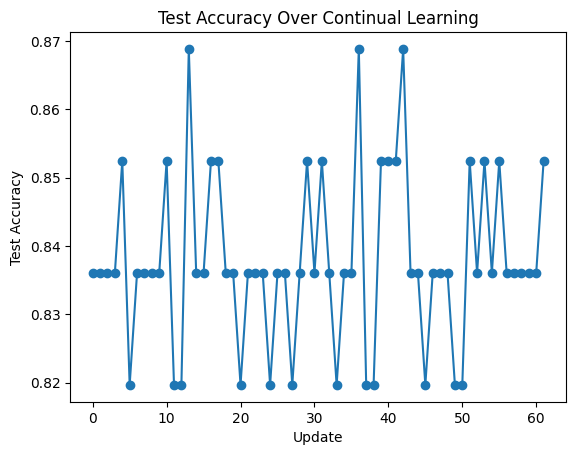

In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


# Split the data into an initial training set and a test set
X_train_initial, X_test, y_train_initial, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train an initial model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_initial, y_train_initial)

# Evaluate on the initial test set
y_pred_initial = model.predict(X_test)
accuracy_initial = accuracy_score(y_test, y_pred_initial)
print(f'Initial Test Accuracy: {accuracy_initial}')

test_accuracies = [accuracy_initial]
# Continual Learning: Retrain the model with new data
for i in range(len(X_train_initial), len(X)):
    X_new_data = X.iloc[i:i+1, :]
    y_new_data = y.iloc[i:i+1]

    # Concatenate old and new data
    X_combined = pd.concat([X_train_initial, X_new_data])
    y_combined = pd.concat([y_train_initial, y_new_data])

    # Retrain the model with combined data
    model.fit(X_combined, y_combined)
    y_pred_continual = model.predict(X_test)
    accuracy_continual = accuracy_score(y_test, y_pred_continual)
    print(f'Test Accuracy after update {i}: {accuracy_continual}')
    test_accuracies.append(accuracy_continual)
    print(f'Test Accuracy after update {i}: {accuracy_continual}')
# Plotting
plt.plot(range(len(test_accuracies)), test_accuracies, marker='o')
plt.xlabel('Update')
plt.ylabel('Test Accuracy')
plt.title('Test Accuracy Over Continual Learning')
plt.show()

# Train 5 mô hình

Optimization terminated successfully.
         Current function value: 0.348904
         Iterations 7


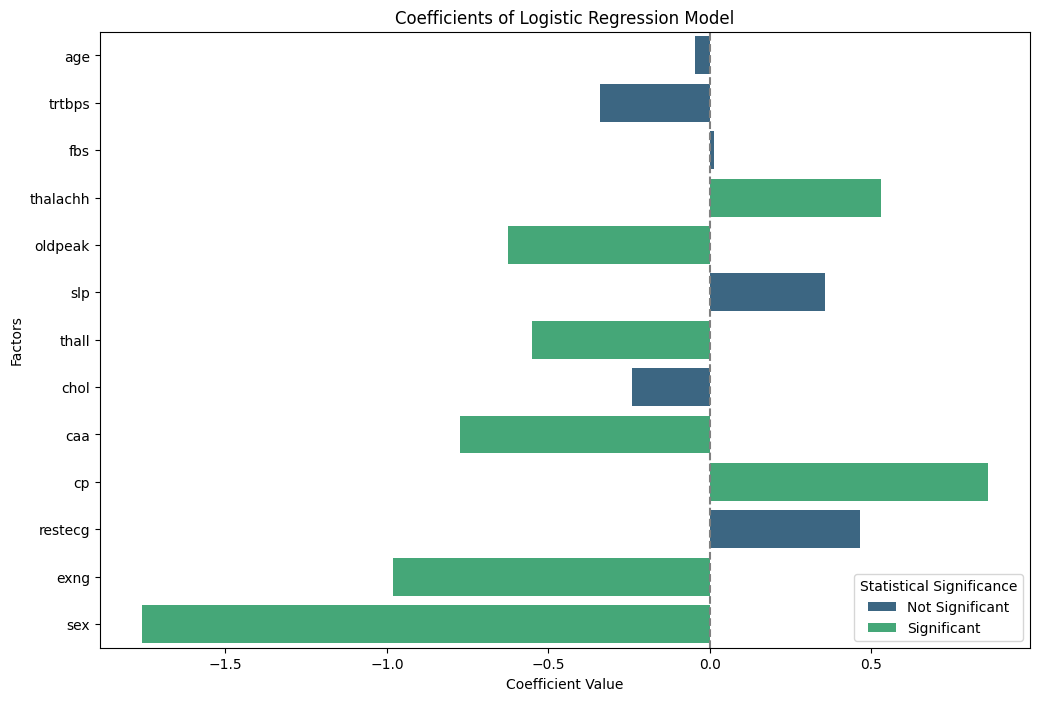

,Factors,Coefficients,P-Values,Significance
0,age,-0.044506,0.832266,Not Significant
1,trtbps,-0.341020,0.059582,Not Significant
2,fbs,0.012406,0.947464,Not Significant
3,thalachh,0.530772,0.026485,Significant
4,oldpeak,-0.626263,0.011523,Significant
5,slp,0.356383,0.097717,Not Significant
6,thall,-0.550403,0.001910,Significant
7,chol,-0.239592,0.220873,Not Significant
8,caa,-0.773349,0.000051,Significant
9,cp,0.859851,0.000004,Significant


In [23]:
X = df_final.drop("output",axis = 1)
y = df_final.output

# Adding a constant to the model (intercept)
X_const = sm.add_constant(X)

# Building the logistic regression model
model = sm.Logit(y, X_const)
result = model.fit()

# Extracting coefficients and p-values
coefficients = result.params[1:]  # Excluding the intercept
p_values = result.pvalues[1:]  # Excluding the intercept for p-values

# Creating a dataframe for visualization
viz_df = pd.DataFrame({
    'Factors': coefficients.index,
    'Coefficients': coefficients.values,
    'P-Values': p_values.values
})

# Adding a column for the significance of coefficients
viz_df['Significance'] = np.where(viz_df['P-Values'] <= 0.05, 'Significant', 'Not Significant')

# Plotting the coefficients
plt.figure(figsize=(12, 8))
sns.barplot(x='Coefficients', y='Factors', data=viz_df, hue='Significance', dodge=False, palette='viridis')
plt.title('Coefficients of Logistic Regression Model')
plt.xlabel('Coefficient Value')
plt.ylabel('Factors')
plt.axvline(x=0, color='grey', linestyle='--')
plt.legend(title='Statistical Significance', loc='lower right')

plt.show()

viz_df

In [24]:
# Filter significant features based on p-values
significant_features = viz_df[viz_df['Significance'] == 'Significant']['Factors'].tolist()

# Keep only significant features in the DataFrame X
X_filtered = X[significant_features]

# Display the DataFrame with only significant features
print(X_filtered.head())


   thalachh   oldpeak     thall  caa  cp  exng  sex
0  0.015443  1.087338 -2.148873    0   3     0    1
1  1.633471  2.122573 -0.512922    0   2     0    1
2  0.977514  0.310912 -0.512922    0   1     0    0
3  1.239897 -0.206705 -0.512922    0   1     0    1
4  0.583939 -0.379244 -0.512922    0   0     1    0


In [25]:
X = df_copy.drop('output',axis=1) 
y = df_copy['output']
X_train,X_test,y_train,y_test = train_test_split(X_filtered,y,test_size=0.3,random_state=142, stratify=y)

In [26]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score,mean_absolute_error,f1_score,precision_score

In [27]:
#Đánh giá 5 mô hình: RandomForestClassifier, SVM, KNeighborsClassifier, AdaBoostClassifier, MLPClassifier satcking

accuracy_scoring = []
f1_scoring = []
precision_scoring = []
recall_scoring = []
roc_scoring = []
model_naming = []
train_score = []
test_score = []


def test_eval(model,X_test,y_test,model_name = "NONE"):
    model_pred_train = model.predict(X_train)
    model_pred_test = model.predict(X_test)
    
    train_score.append(mean_absolute_error(y_train,model_pred_train))
    test_score.append(mean_absolute_error(y_test,model_pred_test))
    accuracy_scoring.append(accuracy_score(y_test,model_pred_test))
    f1_scoring.append(f1_score(y_test,model_pred_test))
    precision_scoring.append(precision_score(y_test,model_pred_test))
    recall_scoring.append(recall_score(y_test,model_pred_test))
    roc_scoring.append(roc_auc_score(y_test,model_pred_test))
    model_naming.append(model_name)    

In [28]:
from sklearn.ensemble import StackingClassifier
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import RandomOverSampler
from sklearn.decomposition import PCA

pipe_rf = Pipeline([("sc",StandardScaler()),
                   ("pca",PCA(n_components=0.95)),
                   ("forest",RandomForestClassifier(criterion= 'entropy', max_features= 'sqrt', n_estimators= 100))])

pipe_svm = Pipeline([("sc",StandardScaler()),
                   ("pca",PCA(n_components=0.95)),
                   ("svm",SVC(C= 100, gamma= 1, kernel= 'rbf'))])

pipe_knn = Pipeline([("sc",StandardScaler()),
                   ("pca",PCA(n_components=0.95)),
                   ("knn",KNeighborsClassifier(algorithm = 'auto', n_neighbors = 3, weights = 'distance'))])

pipe_ada = Pipeline([("sc",StandardScaler()),
                   ("pca",PCA(n_components=0.95)),
                   ("ada",AdaBoostClassifier(algorithm = 'SAMME.R', learning_rate = 0.5, n_estimators = 1000))])

pipe_mlp = Pipeline([('scaler',StandardScaler()),
                   ('pca',PCA(n_components=0.95)),
                   ('mlp',MLPClassifier(hidden_layer_sizes=(128,64,32), max_iter=300,
                                        activation='relu',solver='adam', random_state=1))])

ensemble_model = [("forest",pipe_rf),("svm",pipe_svm),("knn",pipe_knn),("ada",pipe_ada),("mlp",pipe_mlp)]

pipe_stacking = Pipeline([("Stacking",StackingClassifier(estimators=ensemble_model, 
                                                         final_estimator=LogisticRegression(random_state=101)))])

final_models = [pipe_rf,pipe_svm,pipe_knn,pipe_ada,pipe_mlp,pipe_stacking]
model_names = {0:"Random Forest",1:"SVM",2:"KNN",3:"AdaBoost",4:"Stacking"}

In [29]:
skf = StratifiedKFold(n_splits=10)

In [30]:
for train_index,test_index in skf.split(X,y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index] 
    y_train, y_test = y[train_index], y[test_index]
    
    #random forest
    final_models[0].fit(X_train,y_train)
    test_eval(final_models[0],X_test,y_test,model_names[0])
    
    #svm
    final_models[1].fit(X_train,y_train)
    test_eval(final_models[1],X_test,y_test,model_names[1])
    
    #knn
    final_models[2].fit(X_train,y_train)
    test_eval(final_models[2],X_test,y_test,model_names[2])
    
    #adaboost
    final_models[3].fit(X_train,y_train)
    test_eval(final_models[3],X_test,y_test,model_names[3])
    
    #stacking
    final_models[4].fit(X_train,y_train)
    test_eval(final_models[4],X_test,y_test,model_names[4])

In [31]:
res_df = pd.DataFrame({'Train':train_score,'Test':test_score,'Accuracy Score':accuracy_scoring,'F1-Score':f1_scoring,
                       'Precsion':precision_scoring,'Recall':recall_scoring,'ROC AUC Score':roc_scoring,'Model':model_naming})

In [32]:
forest_res = res_df[res_df['Model'] == 'Random Forest']
svm_res = res_df[res_df['Model'] == 'SVM']
knn_res = res_df[res_df['Model'] == 'KNN']
ada_res = res_df[res_df['Model'] == 'AdaBoost']
stacking_res = res_df[res_df['Model'] == 'Stacking']

model_compile = [forest_res,svm_res,knn_res,ada_res,stacking_res]

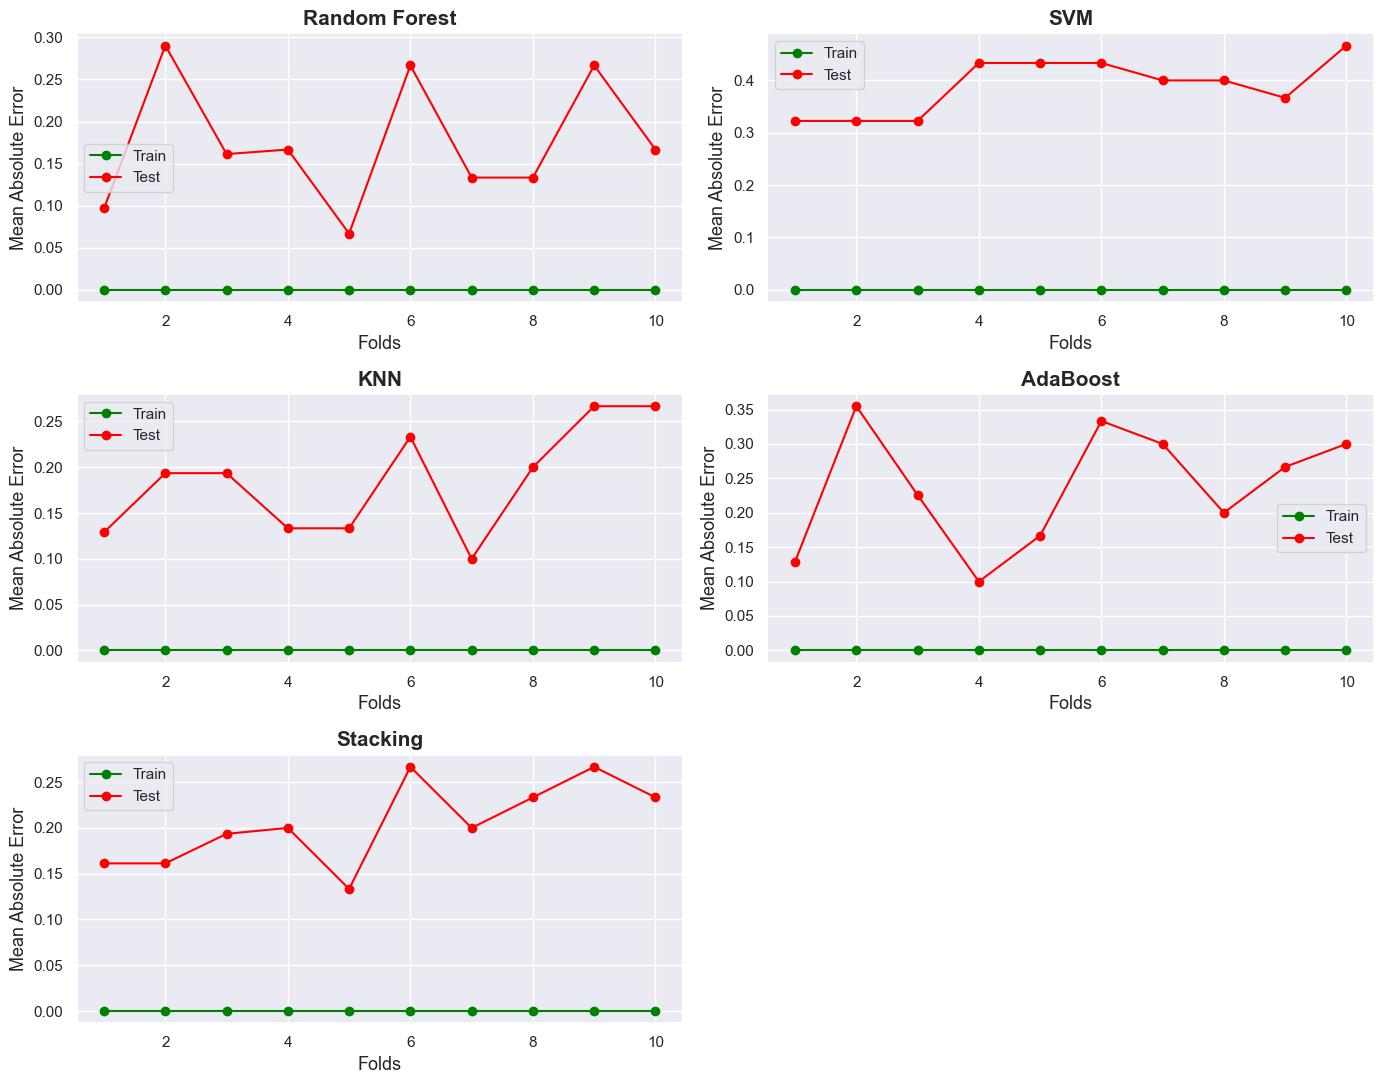

In [33]:
sns.set(rc={"figure.figsize":(14, 11)})

folds = range(1,skf.get_n_splits()+1)
for i,models in enumerate(model_compile):
    plt.subplot(3,2,i+1)
    plt.plot(folds,models["Train"],'o-',color='green',label="Train")
    plt.plot(folds,models["Test"],'o-',color='red',label="Test")
    plt.xlabel("Folds",fontsize=13)
    plt.ylabel("Mean Absolute Error",fontsize=13)
    plt.title(model_names[i],fontsize=15,fontweight='bold')
    plt.legend()

plt.tight_layout()